<a href="https://colab.research.google.com/github/Ron-Wu/Machine-learning-0602/blob/main/0602regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


CRIM：人均犯罪率

ZN：25,000平方英尺以上民用土地的比例

INDUS：城镇非零售业商用土地比例

CHAS：是否邻近查尔斯河，1是邻近，0是不邻近

NOX：一氧化氮浓度（千万分之一）

RM：住宅的平均房间数

AGE：自住且建于1940年前的房屋比例

DIS：到5个波士顿就业中心的加权距离

RAD：到高速公路的便捷度指数

TAX：每万元的房产税率

PTRATIO：城镇学生教师比例

B： 1000(Bk − 0.63)2 其中Bk是城镇中黑人比例

LSTAT：低收入人群比例

ans：自住房中位数价格，单位是千

In [22]:
## latex math 
## https://en.wikibooks.org/wiki/LaTeX/Mathematics

In [23]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
# DataFrame: 表格，Series: 一行/一列
df = pd.DataFrame(boston["data"], 
          columns = boston["feature_names"])

df["ans"] = boston["target"]

# 將表格轉成 csv 表格
df.to_csv("boston.csv", encoding="utf-8", index = False)

# g 使用jupyter的方法印出
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ans
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [24]:
# sklearn前: pandas.DataFrame
# sklearn後: np.array
import numpy as np
from sklearn.model_selection import train_test_split
x,y = np.array(df.drop(["ans"], axis = 1)), np.array(df["ans"])
# 90% x, 10% x, 90% y, 10% y
x_train, x_test, y_train, y_test = train_test_split(x,
                             y,
                             test_size = 0.1 )

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 13)
(51, 13)
(455,)
(51,)


In [25]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=3)  ### max_depth=3
reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

[Text(558.0, 951.3000000000001, 'RM <= 6.941\nmse = 81.992\nsamples = 455\nvalue = 22.498'),
 Text(279.0, 679.5, 'LSTAT <= 14.4\nmse = 39.191\nsamples = 391\nvalue = 20.054'),
 Text(139.5, 407.70000000000005, 'DIS <= 1.434\nmse = 23.78\nsamples = 232\nvalue = 23.476'),
 Text(69.75, 135.89999999999998, 'mse = 91.577\nsamples = 4\nvalue = 44.475'),
 Text(209.25, 135.89999999999998, 'mse = 14.719\nsamples = 228\nvalue = 23.107'),
 Text(418.5, 407.70000000000005, 'CRIM <= 7.006\nmse = 19.675\nsamples = 159\nvalue = 15.062'),
 Text(348.75, 135.89999999999998, 'mse = 11.595\nsamples = 94\nvalue = 17.227'),
 Text(488.25, 135.89999999999998, 'mse = 14.788\nsamples = 65\nvalue = 11.932'),
 Text(837.0, 679.5, 'RM <= 7.437\nmse = 84.045\nsamples = 64\nvalue = 37.43'),
 Text(697.5, 407.70000000000005, 'CRIM <= 6.99\nmse = 38.759\nsamples = 36\nvalue = 31.456'),
 Text(627.75, 135.89999999999998, 'mse = 12.587\nsamples = 33\nvalue = 33.006'),
 Text(767.25, 135.89999999999998, 'mse = 9.307\nsamples =

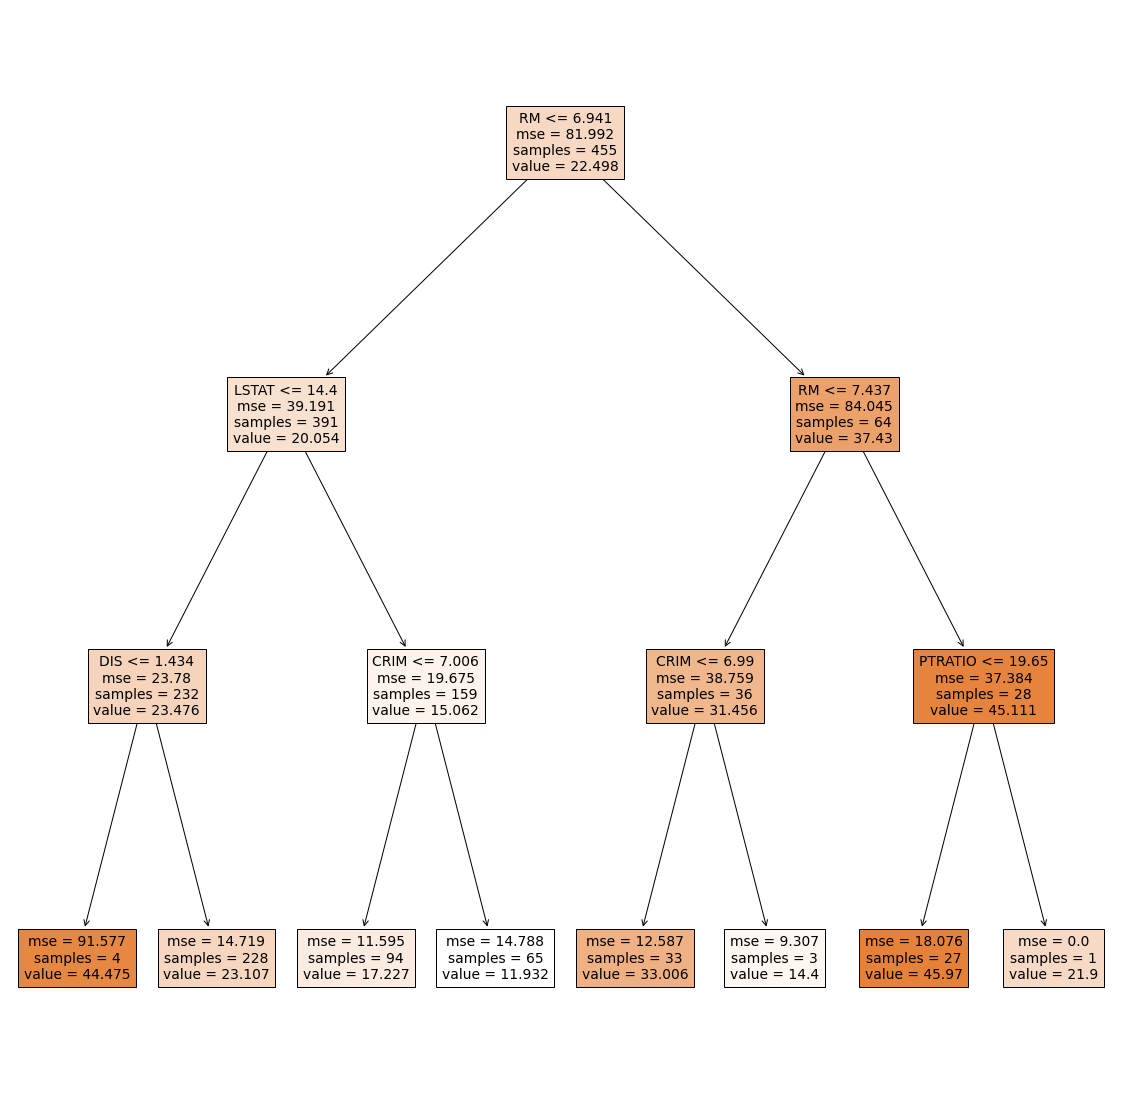

In [26]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 可以調整 plot_tree 顯示出來的大小
plt.figure(figsize = (20, 20))

plot_tree(reg,
     feature_names = boston["feature_names"],
     filled = True)

In [27]:
from sklearn.metrics import r2_score

# 驗證目的是為了得到標準改先前model的參數
pre = reg.predict(x_test)

# 根據得到的信心分數去更改先前的參數 max_depth = x ,越多層不一定越好 
r2_score(y_test, pre)

0.6477039845102113